In [35]:
import os
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
plt.style.use('ggplot')

In [36]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [37]:
data = pd.read_csv('./UFC Data/data1.csv')
fighter_data = pd.read_csv('./UFC Data/raw_fighter_data1.csv')
betting_data = pd.read_csv('./UFC Data/betting_data.csv')

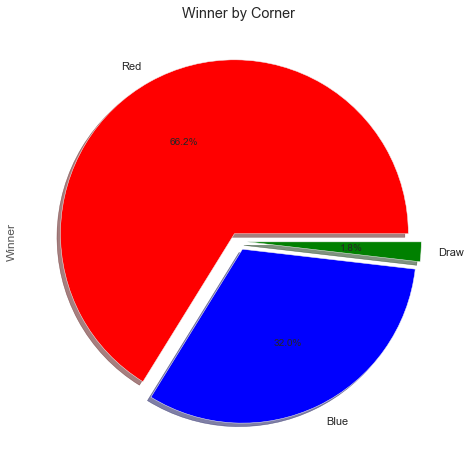

In [38]:
colors = ['red', 'blue', 'green']
plt.figure(figsize=(15,8))
P=data['Winner'].value_counts()[:10].plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',colors=colors,shadow=True)
plt.title('Winner by Corner')
P

In [39]:
import datetime
data.loc[:,'date'] = data['date'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d'))
data_modern = data.loc[data['date'] > datetime.datetime(2010,1,1)]

### Why 2010? Major UFC personalities would be gaining in popularity. Stats recordings would become more advacned, and in 2011 the UFC would sign a partnership with Fox, allowing the company to gain more legitimacy and have access to more financial and logistical resources. The sport has become "Mainstream"

In [40]:
recent_wins = data_modern.copy()

In [41]:
blue_wins = sum(recent_wins['Winner'] == 'Blue')
red_wins = sum(recent_wins['Winner'] == 'Red')
draw_wins = sum(recent_wins['Winner'] == 'Draw')

### Using data after 1/1/2010, we can see that the Red Side win rate drops to 58.3%. Closer to even, yet still an advantage over Blue Side

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0, 0.5, 'Percent')

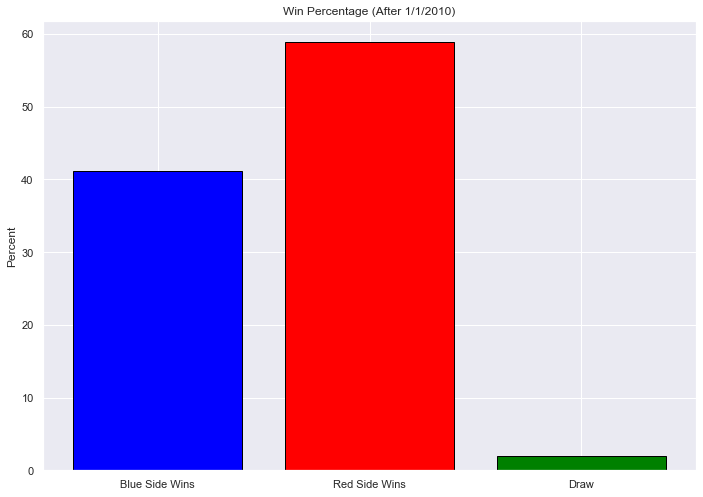

In [43]:
x_labels = ('Blue Side Wins', 'Red Side Wins', 'Draw') 
y_pos = np.arange(len(x_labels)) 
wins = ((blue_wins / (blue_wins + red_wins))*100, (red_wins / (blue_wins + red_wins))*100, (draw_wins / (blue_wins + red_wins))*100) 
plt.bar(y_pos, wins, align='center', color=['blue', 'red', 'green'], edgecolor='black') 
plt.xticks(y_pos, x_labels)
plt.title("Win Percentage (After 1/1/2010)")
plt.ylabel("Percent")

### This indicates that more championship bouts have been won or retained by the Red Side, this may be the contributing factor to the higher winrrate on Red Side. 

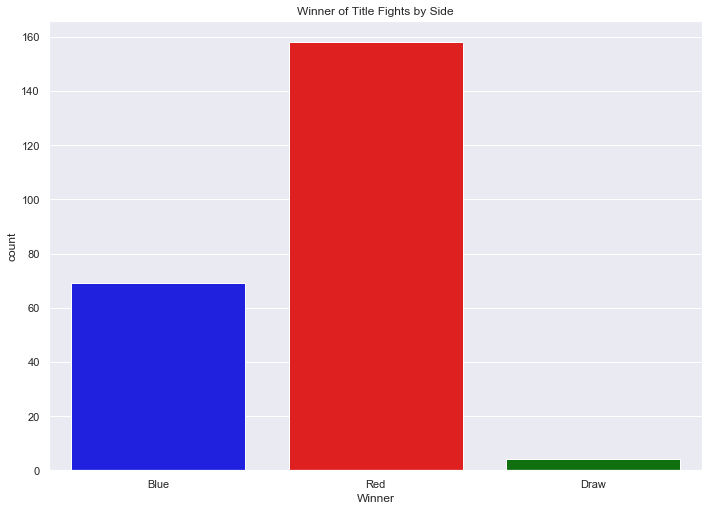

In [51]:
a = data_modern['Winner'][data_modern['title_bout']== True]
sns.countplot(a, palette = ['Blue', 'Red', 'Green'])
blue, red, draw = a.value_counts()
plt.title("Winner of Title Fights by Side")

def without_hue(plot, feature):
    total = len(feature)
    for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        a.annotate(percentage, (x, y), size = 12)
plt.show()

## Here are the amount of title fights vs regular fights that have occured in the UFC using recent data.

In [1]:
from scipy import stats

# Do a T-Test to compare percent of wins for red vs. blue against the overall data of percent of title fights vs regular fights. To get the average of the two numbers

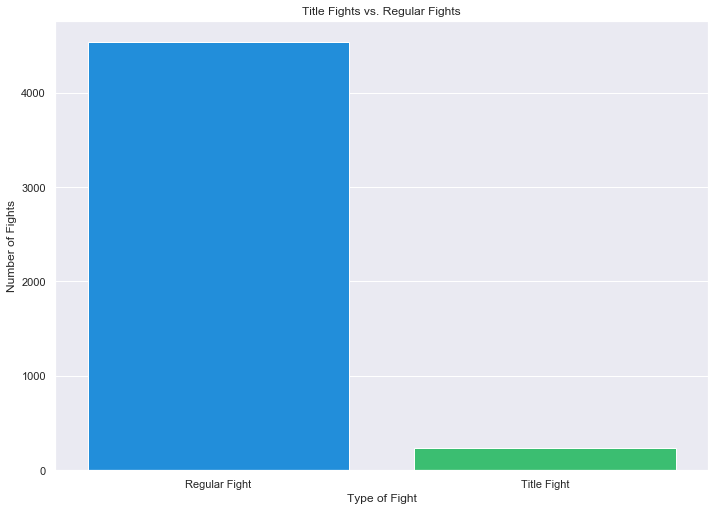

In [69]:
sns.set_palette("terrain") 
g = sns.countplot(x="title_bout", data=data_modern)
g.set_xticks([0,1])
g.set_xticklabels(['Regular Fight','Title Fight'])
g.set(xlabel="Type of Fight",ylabel="Number of Fights")
plt.title("Title Fights vs. Regular Fights")
plt.show()

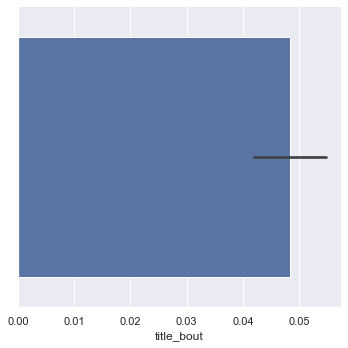

In [22]:
g = sns.catplot(x='title_bout', kind='bar', data=data_modern)
g

#### The number of title fights won by red side and the total number of title fights that have occured compared to regular fights is not big enough to cause the discrepancy in red side wins

In [51]:
# sns.set_palette("RdBu")
# fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
# fig.suptitle("Title Fights vs. Regular Fights")
# sns.countplot(x="title_bout", data=recentwins, ax=ax)
# ax.set(xlabel="Title or Regular",ylabel="Number of Fights")
# fig.set_xticks([0,1])
# fig.set_xticklabels(['Regular Fight','Title Fight'])
# plt.axes.Axes.Bar(xtick_label=["Regular Fight","Title Fight"])
# plt.show()

### Are there any significant differences in win rates with fighter age, height and reach?

### Any meaningful with winner. Add winner by side instead of just the averages. Rheight-Bheight number is + if they are taller. Is there meaningful difference in the case of wins. Use Scatterplot in order to color the data to idicate redvsblue winner. Look into it further with the wins. 

In [43]:
data_modernheight = data_modern.copy()
pd.options.mode.chained_assignment = None

In [44]:
data_modernheight['R_Height_cms'] = data_modernheight['R_Height_cms'].fillna(data_modernheight['R_Height_cms'].mean())

In [45]:
data_modernheight['B_Height_cms'] = data_modernheight['B_Height_cms'].fillna(data_modernheight['B_Height_cms'].mean())

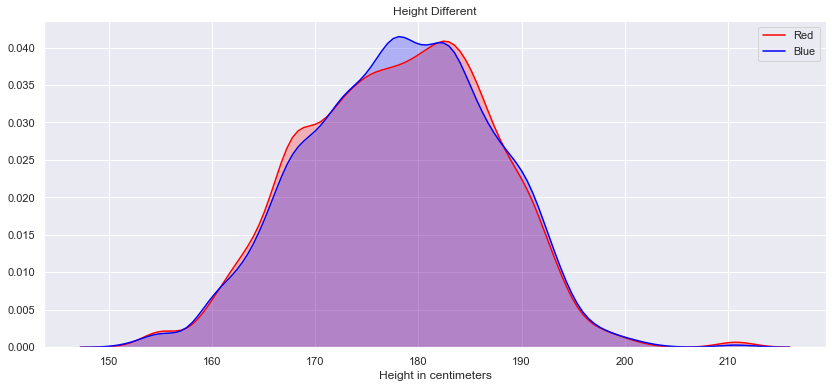

In [46]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(data_modernheight.R_Height_cms, shade=True, color='red', label='Red')
sns.kdeplot(data_modernheight.B_Height_cms, shade=True, color='blue', label='Blue')
plt.xlabel('Height in centimeters')
plt.title('Height Different')

plt.show()

In [47]:
data_modernreach = data_modern.copy()

In [48]:
data_modernreach['R_Reach_cms'] = data_modernreach['R_Reach_cms'].fillna(data_modernreach['R_Reach_cms'].mean())

In [49]:
data_modernreach['B_Reach_cms'] = data_modernreach['B_Reach_cms'].fillna(data_modernreach['B_Reach_cms'].mean())

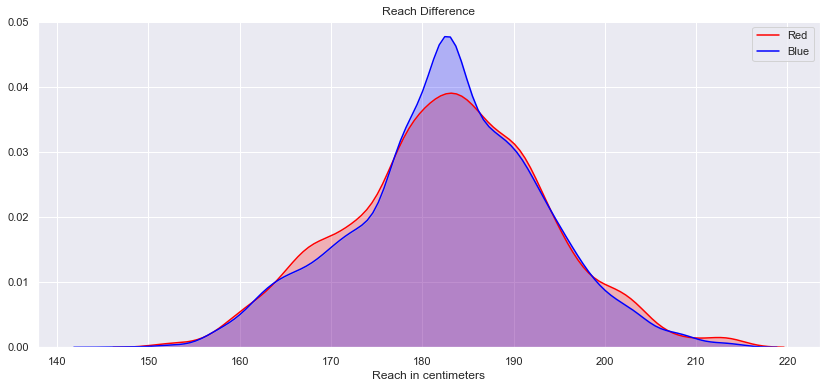

In [50]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(data_modernreach.R_Reach_cms, shade=True, color='red', label='Red')
sns.kdeplot(data_modernreach.B_Reach_cms, shade=True, color='blue', label='Blue')
plt.xlabel('Reach in centimeters')
plt.ylabel('')
plt.title('Reach Difference')

plt.show()

In [51]:
data_modernage = data_modern.copy()

In [54]:
data_modernage['R_age'] = data_modernage['R_age'].fillna(data_modernage['R_age'].mean())

In [55]:
data_modernage['B_age'] = data_modernage['B_age'].fillna(data_modernage['B_age'].mean())

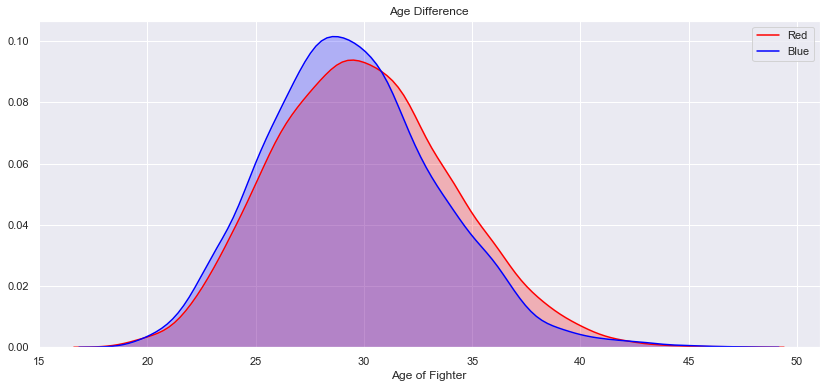

In [56]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(data_modernage.R_age, shade=True, color='red', label='Red')
sns.kdeplot(data_modernage.B_age, shade=True, color='blue', label='Blue')
plt.xlabel('Age of Fighter')
plt.ylabel('')
plt.title('Age Difference')

plt.show()

#### Blue fighters had a longer reach while red fighters are slightly older, height is similar. With minimal differences of height, age and reach contributing to the variation of side win rates, there has to be another variable in play that gives Red Side the advantage.

### Looking at stance winrate by side to see if stance plays a role in side outcome

In [135]:
stances = recent_wins[['B_Stance','R_Stance','Winner']]
blue_winner_stance = pd.DataFrame(stances.loc[stances['Winner'] == 'Blue'][['B_Stance','R_Stance','Winner']]['B_Stance'].value_counts())
blue_winner_stance = blue_winner_stance.reset_index()
blue_winner_stance.columns = ['Stance','Number of Blue Fighters']
red_winner_stance = pd.DataFrame(stances.loc[stances['Winner'] == 'Red'][['B_Stance','R_Stance','Winner']]['R_Stance'].value_counts())
red_winner_stance = red_winner_stance.reset_index()
red_winner_stance.columns = ['Stance','Number of Red Fighters']

In [136]:
blue_winner_stance.loc[:,'Percentage'] = blue_winner_stance['Number of Blue Fighters']/np.sum(blue_winner_stance['Number of Blue Fighters'])
blue_winner_stance

,Stance,Number of Blue Fighters,Percentage
0,Orthodox,1432,0.745445
1,Southpaw,398,0.207184
2,Switch,90,0.046851
3,Open Stance,1,0.000521


In [137]:
red_winner_stance.loc[:,'Percentage'] = red_winner_stance['Number of Red Fighters']/np.sum(red_winner_stance['Number of Red Fighters'])
red_winner_stance

,Stance,Number of Red Fighters,Percentage
0,Orthodox,2054,0.748542
1,Southpaw,591,0.215379
2,Switch,97,0.035350
3,Open Stance,2,0.000729


In [144]:
fig = px.pie(red_winner_stance, values='Percentage', names='Stance', title='Stance Win Percentage on Red Side')
fig.show()

In [139]:
fig = px.pie(blue_winner_stance, values='Percentage', names='Stance', title='Stance Win Percentage on Blue Side')
fig.show()

### No major discrepancies between red side and blue side winrates when it comes to stance. 

# Pick two UFC champions that have title defences. Filter the data frame to just these two. (possibly add a new column that indicates defense) Indicate which ones are title defenses, see who the winner is with red side. Is red side the most common side for title defenses?

# UFC PPV buys, who the most popular fighters are. make new df and see who is on which side. Use google sheet csv of the paper view buys. see which side they're on based on popularity. 

## Take the name and date of both csv dataframes the event and data . Add a column in events data frame that is the two last names in a list. The data.csv needs to be changed to a list as well. Make sure they contain the same names. Make sure both names return true. Events csv: split space vs . space do an or to check for both conditions. Check for red fighter see if they're in both csv's. Do same thing for blue. Comparing conditionals. 


## new column in events.csv to take last names from red and blue fighter, order the names alphabetical order as a string. Pair that df with the data.csv. See if both of them add together. Join to get an exact join. Looking only at the inner join.  

## Betting data is used to understand how often red side is favored. This can lead us to our answer

In [156]:
betting_data.head()

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,underdog
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,Blue
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,Red
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,Blue
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,Blue
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,Blue


In [ ]:
betting_data[['Winner','underdog']]

In [103]:
betting_data[['R_odds', 'B_odds']].describe()

,R_odds,B_odds
count,4240.000000,4240.000000
mean,-118.092217,68.525708
std,272.796068,252.371462
min,-1700.000000,-1200.000000
25%,-256.250000,-145.000000
50%,-150.000000,130.000000
75%,130.000000,225.000000
max,775.000000,1300.000000


### Betting odds of Red vs Blue 

In [104]:
odds = betting_data[['R_odds','B_odds']]

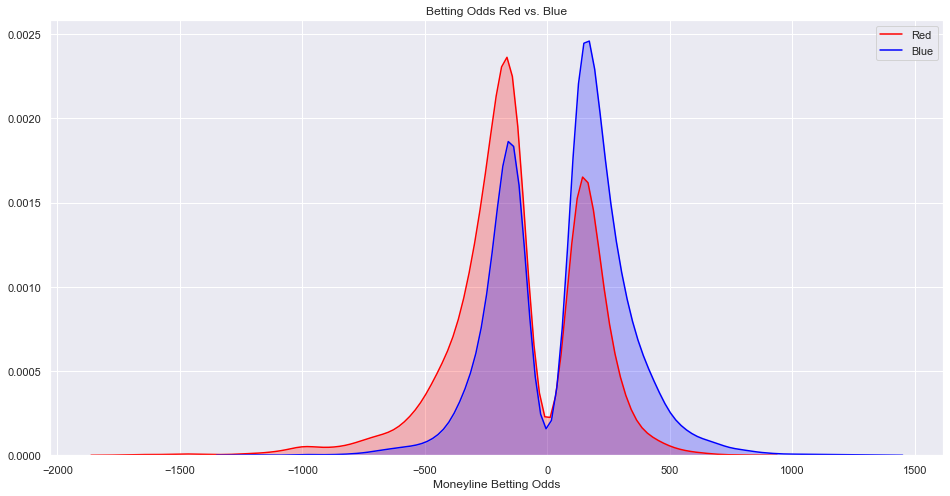

In [157]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.kdeplot(odds.R_odds, shade=True, color='red', label='Red')
sns.kdeplot(odds.B_odds, shade=True, color='blue', label='Blue')
plt.xlabel('Moneyline Betting Odds')
plt.ylabel('')
plt.title('Betting Odds Red vs. Blue')

plt.show()

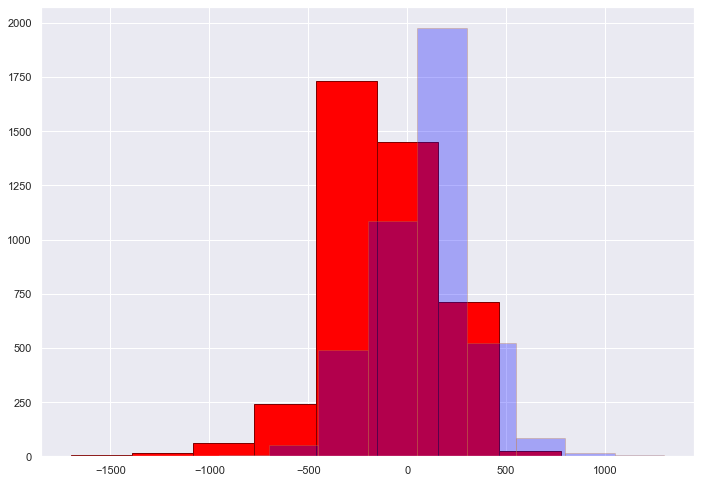

In [132]:
plt.hist(odds['R_odds'],
        facecolor='red',
        edgecolor='maroon',
        bins=8)
plt.hist(odds['B_odds'],
        facecolor='blue',
        edgecolor='peru',
        bins=10,
        alpha = 0.3)
plt.show()

In [134]:
# fig = px.histogram(odds, x="R_odds")
# fig1 = px.histogram(odds, x="B_odds")
# fig.show()
# fig1.show()

### Looking at the betting data to see how often the favorite wins over the underdog

In [78]:
betting_data['underdog'] = ''

red_underdog_mask = betting_data['R_odds'] > betting_data['B_odds']
#print(red_underdog_mask)
#print()

blue_underdog_mask = betting_data['B_odds'] > betting_data['R_odds']
#print(blue_underdog_mask)
#print()

even_mask = (betting_data['B_odds'] == betting_data['R_odds'])
#print(even_mask)
#print()

betting_data['underdog'][red_underdog_mask] = 'Red'
betting_data['underdog'][blue_underdog_mask] = 'Blue'
betting_data['underdog'][even_mask] = 'Even'

In [79]:
df_no_even = betting_data[betting_data['underdog'] != 'Even']
df_no_even = df_no_even[df_no_even['Winner'] != 'Draw']
print(f"Number of fights including even fights and draws: {len(betting_data)}")
print(f"Number of fights with even fights and draws removed: {len(df_no_even)}")

Number of fights including even fights and draws: 5528
Number of fights with even fights and draws removed: 5376


In [155]:
number_of_fights = len(df_no_even)
number_of_upsets = len(df_no_even[df_no_even['Winner'] == df_no_even['underdog']])
number_of_favorites = len(df_no_even[df_no_even['Winner'] != df_no_even['underdog']])
#print(number_of_upsets)
#print(number_of_fights)
#print(number_of_favorites)
upset_percent = (number_of_upsets / number_of_fights) * 100
favorite_percent = (number_of_favorites / number_of_fights) * 100
#print(upset_percent)
#print(favorite_percent)
labels = 'Favorites', 'Underdogs'
sizes = [favorite_percent, upset_percent]
# fig1, ax1 = plt.subplots(figsize=(9,9))
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
fig1, g = sns.countplot(x="title_bout", data=sizes)
g.set(xlabel="Type of Fight",ylabel="Number of Fights")

AttributeError: 'list' object has no attribute 'get'

### How are sides favorited to their respective win rates?

### How often is red side favored by the betting data / total number of fights. What's the percentage?

### What is the frequency of blue fighters favorited and winning and losing

### What is the frequency of red fighters favorited and winning and losing

## groupby red is favorited. count the matches where red loses. divide by total number of matches red is favored in. Do the same thing for blue side. Can do for underdog

#### Safe bet is red. Putting 10dollars on every red match. Do you win or lose money? Is this a viable way to make money? Do a calculation. 
##### Do this afer everything else